<a href="https://colab.research.google.com/github/dineshjakkam/machine-learning-projects/blob/master/models/colab/cos_wave_model_tinyml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the basics of TinyML
* The goal of this project is to train a simple model that can take a value x, 
and predicts its cos *(trignometric function)*, y.

* In a real-world if you need a cos value, we can just directly call it as cos(x). But as part of this learning experience, we train a model using TensorFlow lite to predict its cosine given a value x.

## Import libraries

In [0]:
# Install TensoFlow Library
!pip install tensorflow==2.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import math

## Generating samples

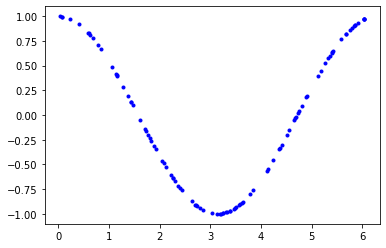

In [6]:
SAMPLES = 100
# Seed value to get the same random numbers each time we run this
# notebook. This can be of any value
SEED = 1993
np.random.seed(SEED)
tf.random.set_seed(SEED)

# np.random.unifrom generates the uniformly distributed random value 
# starting 0 to 2*pi, which cover complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# Shuffle the values to make sure they are not in order
np.random.shuffle(x_values)

# calculate corresponding cos values
y_values = np.cos(x_values)

# Plot the values using matplotlib
# b dot indicates blue dots
plt.plot(x_values, y_values, 'b.')
plt.show()

## Add noise to the samples

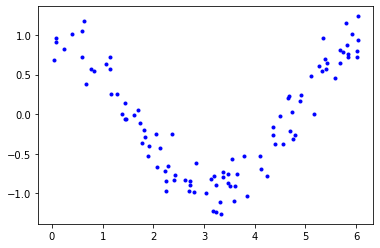

In [11]:
# Add a small random number to each y_value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot the values using matplotlib
# b dot indicates blue dots
plt.plot(x_values, y_values, 'b.')
plt.show()

## Split the data

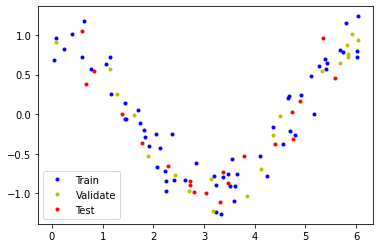

In [15]:
# We use 60% of data for training, 20% for validation and the
# remianing 20% for testing. Split the indices as required
TRAIN_SPLIT = int(0.6*SAMPLES)
TEST_SPLIT = int(0.2*SAMPLES + TRAIN_SPLIT)

# Given two indices np.split chop the data into three parts
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

# Plot the data is each partition in different colors
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()